In [1]:
import pandas as pd 
import numpy as np

In [3]:
# load pre cleaned data from 2015 
df = pd.read_csv('/Users/meganpolak/Documents/2015_HMDA_data.csv')
df

,Unnamed: 0,Year,Loan_Type,Property_Type,Loan_Purpose,Occupancy,Loan_Amount,Preapproval,Action_Type,State_Code,County_Code,Applicant_Income,Purchaser_Type,Denial_Reason_1,Denial_Reason_2,Denial_Reason_3,Lien_Status,Class,approved/denyed
0,0,2015,1,1,2,1,10,3,4,2.0,20.0,76.0,0,NaN,NaN,NaN,2,0,denied
1,1,2015,3,1,3,1,198,3,4,2.0,170.0,185.0,0,NaN,NaN,NaN,1,0,denied
2,2,2015,1,1,3,1,222,3,3,2.0,170.0,115.0,0,NaN,NaN,NaN,1,0,denied
3,3,2015,1,1,3,2,188,3,3,2.0,170.0,115.0,0,NaN,NaN,NaN,1,0,denied
4,4,2015,1,1,3,2,216,3,1,2.0,20.0,230.0,7,NaN,NaN,NaN,1,1,approved
5,5,2015,1,1,3,1,219,3,1,2.0,170.0,145.0,1,NaN,NaN,NaN,1,1,approved
6,6,2015,1,1,3,2,188,3,1,2.0,170.0,145.0,1,NaN,NaN,NaN,1,1,approved
7,7,2015,1,1,2,1,533,3,1,2.0,20.0,134.0,7,NaN,NaN,NaN,1,1,approved
8,8,2015,1,1,3,2,203,3,1,2.0,20.0,136.0,7,NaN,NaN,NaN,1,1,approved
9,9,2015,1,1,2,1,275,3,1,2.0,20.0,139.0,7,NaN,NaN,NaN,1,1,approved


In [35]:
# drop NA in state and county 
df=df.dropna(subset=['State_Code','County_Code'])

In [36]:
cols1=['State_Code','County_Code']

In [37]:
df[cols1]=df[cols1].applymap(np.int64)

/Users/meganpolak/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [38]:
# load state codes data 
state= pd.read_csv('/Users/meganpolak/Downloads/StateCodes.csv', sep=',', engine='python')
state

,Name,FIPS State Numeric Code,Official�USPS Code
0,Alabama,1,AL
1,Alaska,2,AK
2,Arizona,4,AZ
3,Arkansas,5,AR
4,California,6,CA
5,Colorado,8,CO
6,Connecticut,9,CT
7,Delaware,10,DE
8,District of Columbia,11,DC
9,Florida,12,FL


In [39]:
state= state.rename(columns={'FIPS State Numeric Code':'State_Code'})

In [40]:
# combine datasets 
comb=df.merge(state,how='left')

In [41]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14075664 entries, 0 to 14075663
Data columns (total 21 columns):
Unnamed: 0            int64
Year                  int64
Loan_Type             int64
Property_Type         int64
Loan_Purpose          int64
Occupancy             int64
Loan_Amount           int64
Preapproval           int64
Action_Type           int64
State_Code            int64
County_Code           int64
Applicant_Income      float64
Purchaser_Type        int64
Denial_Reason_1       float64
Denial_Reason_2       float64
Denial_Reason_3       float64
Lien_Status           int64
Class                 int64
approved/denyed       object
Name                  object
Official�USPS Code    object
dtypes: float64(4), int64(14), object(3)
memory usage: 2.3+ GB


In [42]:
# drop unnamed col 
comb=comb.drop(['Unnamed: 0'], axis=1)

In [44]:
# remame 
comb=comb.rename(columns={'Name':'Property_Location','Official�USPS Code':'USPS_Code'})

In [45]:
comb.Action_Type.value_counts()

1    7383304
3    2232849
6    2099950
4    1443286
5     518225
2     397137
8        507
7        406
Name: Action_Type, dtype: int64

In [46]:
comb.isnull().sum()

Year                        0
Loan_Type                   0
Property_Type               0
Loan_Purpose                0
Occupancy                   0
Loan_Amount                 0
Preapproval                 0
Action_Type                 0
State_Code                  0
County_Code                 0
Applicant_Income            0
Purchaser_Type              0
Denial_Reason_1      12637239
Denial_Reason_2      13779176
Denial_Reason_3      14021502
Lien_Status                 0
Class                       0
approved/denyed             0
Property_Location       58794
USPS_Code               58794
dtype: int64

In [309]:
#denied=comb[['Denial_Reason_1','Denial_Reason_2','Denial_Reason_3']]

In [310]:
# drop all that have no reason for rejection 
#onlyRejected=comb.dropna(subset = ['Denial_Reason_1', 'Denial_Reason_2', 'Denial_Reason_3'])


In [47]:
# fill in Na with 0 asssuming these are approved 
comb['Denial_Reason_1'].fillna(0,inplace=True)

In [48]:
comb['Denial_Reason_2'].fillna(0,inplace=True)

In [49]:
comb['Denial_Reason_3'].fillna(0,inplace=True)

In [50]:
# convert columns into int type 
cols=['Denial_Reason_1', 'Denial_Reason_2', 'Denial_Reason_3']

In [51]:
#convert cols into int type
comb[cols]=comb[cols].applymap(np.int64)

In [22]:
# drop NA in state and county 
#comb=comb.dropna(subset=['State_Code','County_Code'])


In [23]:
# covert state code and county code into int type 
#cols1=['State_Code','County_Code']

In [24]:
#comb[cols1]=comb[cols1].applymap(np.int64)

In [52]:
comb.shape

(14075664, 20)

In [53]:
# remove all Application withdrawn by applicant
comb=comb[comb.Action_Type!=4]

In [54]:
# remove all File closed for incompleteness
comb=comb[comb.Action_Type!=5]

In [55]:
comb.shape

(12114153, 20)

In [56]:
comb.Action_Type.value_counts()

1    7383304
3    2232849
6    2099950
2     397137
8        507
7        406
Name: Action_Type, dtype: int64

In [57]:
comb.isnull().sum()

Year                     0
Loan_Type                0
Property_Type            0
Loan_Purpose             0
Occupancy                0
Loan_Amount              0
Preapproval              0
Action_Type              0
State_Code               0
County_Code              0
Applicant_Income         0
Purchaser_Type           0
Denial_Reason_1          0
Denial_Reason_2          0
Denial_Reason_3          0
Lien_Status              0
Class                    0
approved/denyed          0
Property_Location    52271
USPS_Code            52271
dtype: int64

In [65]:
# laod GDP data
gdp= pd.read_csv('/Users/meganpolak/Downloads/GDP_all_states.csv')

In [66]:
gdp.isnull().sum()

State                               0
Year                                0
Gross State Product(in billions)    0
Real State Growth %                 0
dtype: int64

In [67]:
# rename 
gdp= gdp.rename(columns={'State':'Property_Location'})


In [68]:
gdp

,Property_Location,Year,Gross State Product(in billions),Real State Growth %
0,Alabama,2017,210.9,1.7
1,Alaska,2017,50.1,-1.9
2,Arizona,2017,314.7,2.2
3,Arkansas,2017,123.7,1.4
4,California,2017,"2,711.80",2.6
5,Colorado,2017,335,2.1
6,Connecticut,2017,271.7,1.5
7,Delaware,2017,72.4,1.0
8,District of Columbia,2017,132.3,2.3
9,Florida,2017,968,2.7


combdf

In [69]:
# merge data with gdp data on Year and Property Location
new_df = pd.merge(comb, gdp,  how='left', left_on=['Property_Location','Year'], right_on = ['Property_Location','Year'])


In [70]:
new_df

,Year,Loan_Type,Property_Type,Loan_Purpose,Occupancy,Loan_Amount,Preapproval,Action_Type,State_Code,County_Code,...,Denial_Reason_1,Denial_Reason_2,Denial_Reason_3,Lien_Status,Class,approved/denyed,Property_Location,USPS_Code,Gross State Product(in billions),Real State Growth %
0,2015,1,1,3,1,222,3,3,2,170,...,0,0,0,1,0,denied,Alaska,AK,53.4,0.6
1,2015,1,1,3,2,188,3,3,2,170,...,0,0,0,1,0,denied,Alaska,AK,53.4,0.6
2,2015,1,1,3,2,216,3,1,2,20,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6
3,2015,1,1,3,1,219,3,1,2,170,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6
4,2015,1,1,3,2,188,3,1,2,170,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6
5,2015,1,1,2,1,533,3,1,2,20,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6
6,2015,1,1,3,2,203,3,1,2,20,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6
7,2015,1,1,2,1,275,3,1,2,20,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6
8,2015,1,1,3,2,159,3,3,2,20,...,0,0,0,1,0,denied,Alaska,AK,53.4,0.6
9,2015,1,1,1,1,410,3,1,2,20,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6


In [71]:
new_df.isnull().sum()

Year                                    0
Loan_Type                               0
Property_Type                           0
Loan_Purpose                            0
Occupancy                               0
Loan_Amount                             0
Preapproval                             0
Action_Type                             0
State_Code                              0
County_Code                             0
Applicant_Income                        0
Purchaser_Type                          0
Denial_Reason_1                         0
Denial_Reason_2                         0
Denial_Reason_3                         0
Lien_Status                             0
Class                                   0
approved/denyed                         0
Property_Location                   52271
USPS_Code                           52271
Gross State Product(in billions)    52271
Real State Growth %                 52271
dtype: int64

In [74]:
new_df.dropna(how='all')

,Year,Loan_Type,Property_Type,Loan_Purpose,Occupancy,Loan_Amount,Preapproval,Action_Type,State_Code,County_Code,...,Denial_Reason_1,Denial_Reason_2,Denial_Reason_3,Lien_Status,Class,approved/denyed,Property_Location,USPS_Code,Gross State Product(in billions),Real State Growth %
0,2015,1,1,3,1,222,3,3,2,170,...,0,0,0,1,0,denied,Alaska,AK,53.4,0.6
1,2015,1,1,3,2,188,3,3,2,170,...,0,0,0,1,0,denied,Alaska,AK,53.4,0.6
2,2015,1,1,3,2,216,3,1,2,20,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6
3,2015,1,1,3,1,219,3,1,2,170,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6
4,2015,1,1,3,2,188,3,1,2,170,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6
5,2015,1,1,2,1,533,3,1,2,20,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6
6,2015,1,1,3,2,203,3,1,2,20,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6
7,2015,1,1,2,1,275,3,1,2,20,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6
8,2015,1,1,3,2,159,3,3,2,20,...,0,0,0,1,0,denied,Alaska,AK,53.4,0.6
9,2015,1,1,1,1,410,3,1,2,20,...,0,0,0,1,1,approved,Alaska,AK,53.4,0.6


In [75]:
new_df.isnull().sum()

Year                                    0
Loan_Type                               0
Property_Type                           0
Loan_Purpose                            0
Occupancy                               0
Loan_Amount                             0
Preapproval                             0
Action_Type                             0
State_Code                              0
County_Code                             0
Applicant_Income                        0
Purchaser_Type                          0
Denial_Reason_1                         0
Denial_Reason_2                         0
Denial_Reason_3                         0
Lien_Status                             0
Class                                   0
approved/denyed                         0
Property_Location                   52271
USPS_Code                           52271
Gross State Product(in billions)    52271
Real State Growth %                 52271
dtype: int64

In [76]:
# load intrest rate data per year 
intRate=pd.read_csv('/Users/meganpolak/Desktop/InterestRateByYear.csv')

In [77]:
intRate

,Year,US_30_yr_FRM,US_15_yr_FRM,US_5/1_ARM
0,2010,4.689808,4.095577,3.824808
1,2011,4.447885,3.684231,3.310962
2,2012,3.657500,2.934423,2.784808
3,2013,3.975577,3.100769,2.877885
4,2014,4.168868,3.286038,3.019245
5,2015,3.850577,3.087500,2.939038
6,2016,3.654038,2.930769,2.876923
7,2017,3.989808,3.272500,3.198846


In [78]:
# merge data on Year 
new_df = pd.merge(new_df,intRate, how='left', left_on=['Year'], right_on = ['Year'])

In [79]:
new_df

,Year,Loan_Type,Property_Type,Loan_Purpose,Occupancy,Loan_Amount,Preapproval,Action_Type,State_Code,County_Code,...,Lien_Status,Class,approved/denyed,Property_Location,USPS_Code,Gross State Product(in billions),Real State Growth %,US_30_yr_FRM,US_15_yr_FRM,US_5/1_ARM
0,2015,1,1,3,1,222,3,3,2,170,...,1,0,denied,Alaska,AK,53.4,0.6,3.850577,3.0875,2.939038
1,2015,1,1,3,2,188,3,3,2,170,...,1,0,denied,Alaska,AK,53.4,0.6,3.850577,3.0875,2.939038
2,2015,1,1,3,2,216,3,1,2,20,...,1,1,approved,Alaska,AK,53.4,0.6,3.850577,3.0875,2.939038
3,2015,1,1,3,1,219,3,1,2,170,...,1,1,approved,Alaska,AK,53.4,0.6,3.850577,3.0875,2.939038
4,2015,1,1,3,2,188,3,1,2,170,...,1,1,approved,Alaska,AK,53.4,0.6,3.850577,3.0875,2.939038
5,2015,1,1,2,1,533,3,1,2,20,...,1,1,approved,Alaska,AK,53.4,0.6,3.850577,3.0875,2.939038
6,2015,1,1,3,2,203,3,1,2,20,...,1,1,approved,Alaska,AK,53.4,0.6,3.850577,3.0875,2.939038
7,2015,1,1,2,1,275,3,1,2,20,...,1,1,approved,Alaska,AK,53.4,0.6,3.850577,3.0875,2.939038
8,2015,1,1,3,2,159,3,3,2,20,...,1,0,denied,Alaska,AK,53.4,0.6,3.850577,3.0875,2.939038
9,2015,1,1,1,1,410,3,1,2,20,...,1,1,approved,Alaska,AK,53.4,0.6,3.850577,3.0875,2.939038


In [93]:
# caluclate PMT for 30 years 
new_df['PMT_30yr']=np.pmt((new_df.US_30_yr_FRM/100)/12,360,new_df.Loan_Amount)

In [94]:
# calculate PMT for 15 years 
new_df['PMT_15yr']=np.pmt((new_df.US_15_yr_FRM/100)/12,180,new_df.Loan_Amount)

In [95]:
# calulate PMT for 5 years 
new_df['PMT_5_ARM']=np.pmt((new_df.US_15_yr_FRM/100)/12,60,new_df.Loan_Amount)

In [96]:
# calculate DTI for 30 15 and 5 years 

new_df['DTI_30yr']= new_df.PMT_30yr/(new_df.Applicant_Income/12)

In [97]:
new_df['DTI_15yr']= new_df.PMT_15yr/(new_df.Applicant_Income/12)

In [98]:
new_df['DTI_5yr']= new_df.PMT_5_ARM/(new_df.Applicant_Income/12)

In [92]:
new_df

,Year,Loan_Type,Property_Type,Loan_Purpose,Occupancy,Loan_Amount,Preapproval,Action_Type,State_Code,County_Code,...,US_30_yr_FRM,US_15_yr_FRM,US_5/1_ARM,PMT_30yr,PMT_15yr,PMT_5/1_ARM,DTI_30yr,DTI_15yr,PMT_5_ARM,DTI_5yr
0,2015,1,1,3,1,222,3,3,2,170,...,3.850577,3.0875,2.939038,-1.040827,-1.542451,-3.997687,-0.108608,-0.160951,-3.997687,-0.417150
1,2015,1,1,3,2,188,3,3,2,170,...,3.850577,3.0875,2.939038,-0.881421,-1.306220,-3.385429,-0.091974,-0.136301,-3.385429,-0.353262
2,2015,1,1,3,2,216,3,1,2,20,...,3.850577,3.0875,2.939038,-1.012697,-1.500763,-3.889642,-0.052836,-0.078301,-3.889642,-0.202938
3,2015,1,1,3,1,219,3,1,2,170,...,3.850577,3.0875,2.939038,-1.026762,-1.521607,-3.943665,-0.084973,-0.125926,-3.943665,-0.326372
4,2015,1,1,3,2,188,3,1,2,170,...,3.850577,3.0875,2.939038,-0.881421,-1.306220,-3.385429,-0.072945,-0.108101,-3.385429,-0.280173
5,2015,1,1,2,1,533,3,1,2,20,...,3.850577,3.0875,2.939038,-2.498923,-3.703272,-9.598051,-0.223784,-0.331636,-9.598051,-0.859527
6,2015,1,1,3,2,203,3,1,2,20,...,3.850577,3.0875,2.939038,-0.951748,-1.410439,-3.655543,-0.083978,-0.124451,-3.655543,-0.322548
7,2015,1,1,2,1,275,3,1,2,20,...,3.850577,3.0875,2.939038,-1.289313,-1.910694,-4.952090,-0.111308,-0.164952,-4.952090,-0.427519
8,2015,1,1,3,2,159,3,3,2,20,...,3.850577,3.0875,2.939038,-0.745457,-1.104728,-2.863209,-0.099394,-0.147297,-2.863209,-0.381761
9,2015,1,1,1,1,410,3,1,2,20,...,3.850577,3.0875,2.939038,-1.922249,-2.848671,-7.383116,-0.205955,-0.305215,-7.383116,-0.791048


In [99]:
# load unemployment rate per state and year 
Unemploy=pd.read_csv('/Users/meganpolak/Documents/Unemp.csv')

In [100]:
Unemploy.shape

(432, 3)

In [101]:
# rename state col to property location 
Unemploy=Unemploy.rename(columns={'State':'Property_Location'})

In [102]:
# add unemployment rate to the df 
new_df = pd.merge(new_df,Unemploy,  how='left', left_on=['Property_Location','Year'], right_on = ['Property_Location','Year'])


In [111]:
new_df

,Year,Loan_Type,Property_Type,Loan_Purpose,Occupancy,Loan_Amount,Preapproval,Action_Type,State_Code,County_Code,...,US_15_yr_FRM,US_5/1_ARM,PMT_30yr,PMT_15yr,PMT_5/1_ARM,DTI_30yr,DTI_15yr,PMT_5_ARM,DTI_5yr,Unemployemnt
0,2015,1,1,3,1,222,3,3,2,170,...,3.0875,2.939038,-1.040827,-1.542451,-3.997687,-0.108608,-0.160951,-3.997687,-0.417150,6.5
1,2015,1,1,3,2,188,3,3,2,170,...,3.0875,2.939038,-0.881421,-1.306220,-3.385429,-0.091974,-0.136301,-3.385429,-0.353262,6.5
2,2015,1,1,3,2,216,3,1,2,20,...,3.0875,2.939038,-1.012697,-1.500763,-3.889642,-0.052836,-0.078301,-3.889642,-0.202938,6.5
3,2015,1,1,3,1,219,3,1,2,170,...,3.0875,2.939038,-1.026762,-1.521607,-3.943665,-0.084973,-0.125926,-3.943665,-0.326372,6.5
4,2015,1,1,3,2,188,3,1,2,170,...,3.0875,2.939038,-0.881421,-1.306220,-3.385429,-0.072945,-0.108101,-3.385429,-0.280173,6.5
5,2015,1,1,2,1,533,3,1,2,20,...,3.0875,2.939038,-2.498923,-3.703272,-9.598051,-0.223784,-0.331636,-9.598051,-0.859527,6.5
6,2015,1,1,3,2,203,3,1,2,20,...,3.0875,2.939038,-0.951748,-1.410439,-3.655543,-0.083978,-0.124451,-3.655543,-0.322548,6.5
7,2015,1,1,2,1,275,3,1,2,20,...,3.0875,2.939038,-1.289313,-1.910694,-4.952090,-0.111308,-0.164952,-4.952090,-0.427519,6.5
8,2015,1,1,3,2,159,3,3,2,20,...,3.0875,2.939038,-0.745457,-1.104728,-2.863209,-0.099394,-0.147297,-2.863209,-0.381761,6.5
9,2015,1,1,1,1,410,3,1,2,20,...,3.0875,2.939038,-1.922249,-2.848671,-7.383116,-0.205955,-0.305215,-7.383116,-0.791048,6.5


In [105]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [106]:
# correlation 
corr = new_df.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/Users/meganpolak/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Year,Loan_Type,Property_Type,Loan_Purpose,Occupancy,Loan_Amount,Preapproval,Action_Type,State_Code,County_Code,Applicant_Income,Purchaser_Type,Denial_Reason_1,Denial_Reason_2,Denial_Reason_3,Lien_Status,Class,Real State Growth %,US_30_yr_FRM,US_15_yr_FRM,US_5/1_ARM,PMT_30yr,PMT_15yr,PMT_5/1_ARM,DTI_30yr,DTI_15yr,PMT_5_ARM,DTI_5yr,Unemployemnt
Year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Loan_Type,nan,1,-0.055,-0.16,-0.16,-0.029,-0.066,0.15,0.025,0.031,-0.099,0.16,-0.036,-0.031,-0.012,0.13,-0.089,-0.034,-1.6e-12,-2.2e-12,7.8e-13,0.029,0.029,0.029,-0.0092,-0.0092,0.029,-0.0092,-0.0097
Property_Type,nan,-0.055,1,-0.059,0.2,0.18,0.031,-0.016,0.012,0.0017,-0.044,-0.097,-0.0018,0.0056,0.0026,-0.046,-0.027,-0.018,3.7e-13,5.9e-13,-6.6e-13,-0.18,-0.18,-0.18,-0.14,-0.14,-0.18,-0.14,0.021
Loan_Purpose,nan,-0.16,-0.059,1,0.0016,0.00049,0.38,-0.061,-0.064,-0.04,0.02,-0.15,0.11,0.032,0.011,-0.13,-0.033,0.038,-1.8e-11,-3.2e-12,-7.2e-12,-0.00049,-0.00049,-0.00049,0.00047,0.00047,-0.00049,0.00047,0.058
Occupancy,nan,-0.16,0.2,0.0016,1,0.11,0.025,-0.043,-0.029,-0.008,0.12,-0.082,0.013,0.0077,0.0037,-0.048,0.036,0.02,-8.5e-13,4.2e-13,2.1e-12,-0.11,-0.11,-0.11,-0.065,-0.065,-0.11,-0.065,0.023
Loan_Amount,nan,-0.029,0.18,0.00049,0.11,1,0.00053,-0.022,-0.05,-0.029,0.17,-0.0027,-0.015,-0.0055,-0.0015,-0.033,0.034,0.064,-8.8e-12,3.7e-12,-6.2e-12,-1,-1,-1,-0.69,-0.69,-1,-0.69,0.044
Preapproval,nan,-0.066,0.031,0.38,0.025,0.00053,1,0.2,-0.022,-0.0052,0.014,-0.13,0.031,0.011,0.0039,0.2,-0.19,0.027,1.8e-12,3.1e-12,7.6e-13,-0.00053,-0.00053,-0.00053,0.0055,0.0055,-0.00053,0.0055,0.011
Action_Type,nan,0.15,-0.016,-0.061,-0.043,-0.022,0.2,1,-0.0029,0.017,-0.036,-0.21,0.12,0.053,0.023,0.88,-0.87,-0.00052,-7.4e-14,1.4e-12,1.7e-12,0.022,0.022,0.022,0.0087,0.0087,0.022,0.0087,-0.00035
State_Code,nan,0.025,0.012,-0.064,-0.029,-0.05,-0.022,-0.0029,1,0.26,-0.035,-0.0069,-0.0055,-0.0022,0.0037,0.011,0.00022,-0.041,2e-11,-2.9e-11,-6.2e-11,0.05,0.05,0.05,0.029,0.029,0.05,0.029,-0.4
County_Code,nan,0.031,0.0017,-0.04,-0.008,-0.029,-0.0052,0.017,0.26,1,-0.019,0.0056,-0.00085,-0.0026,-0.0019,0.021,-0.016,0.12,2.5e-11,-1.7e-11,-8.9e-12,0.029,0.029,0.029,0.019,0.019,0.029,0.019,-0.22


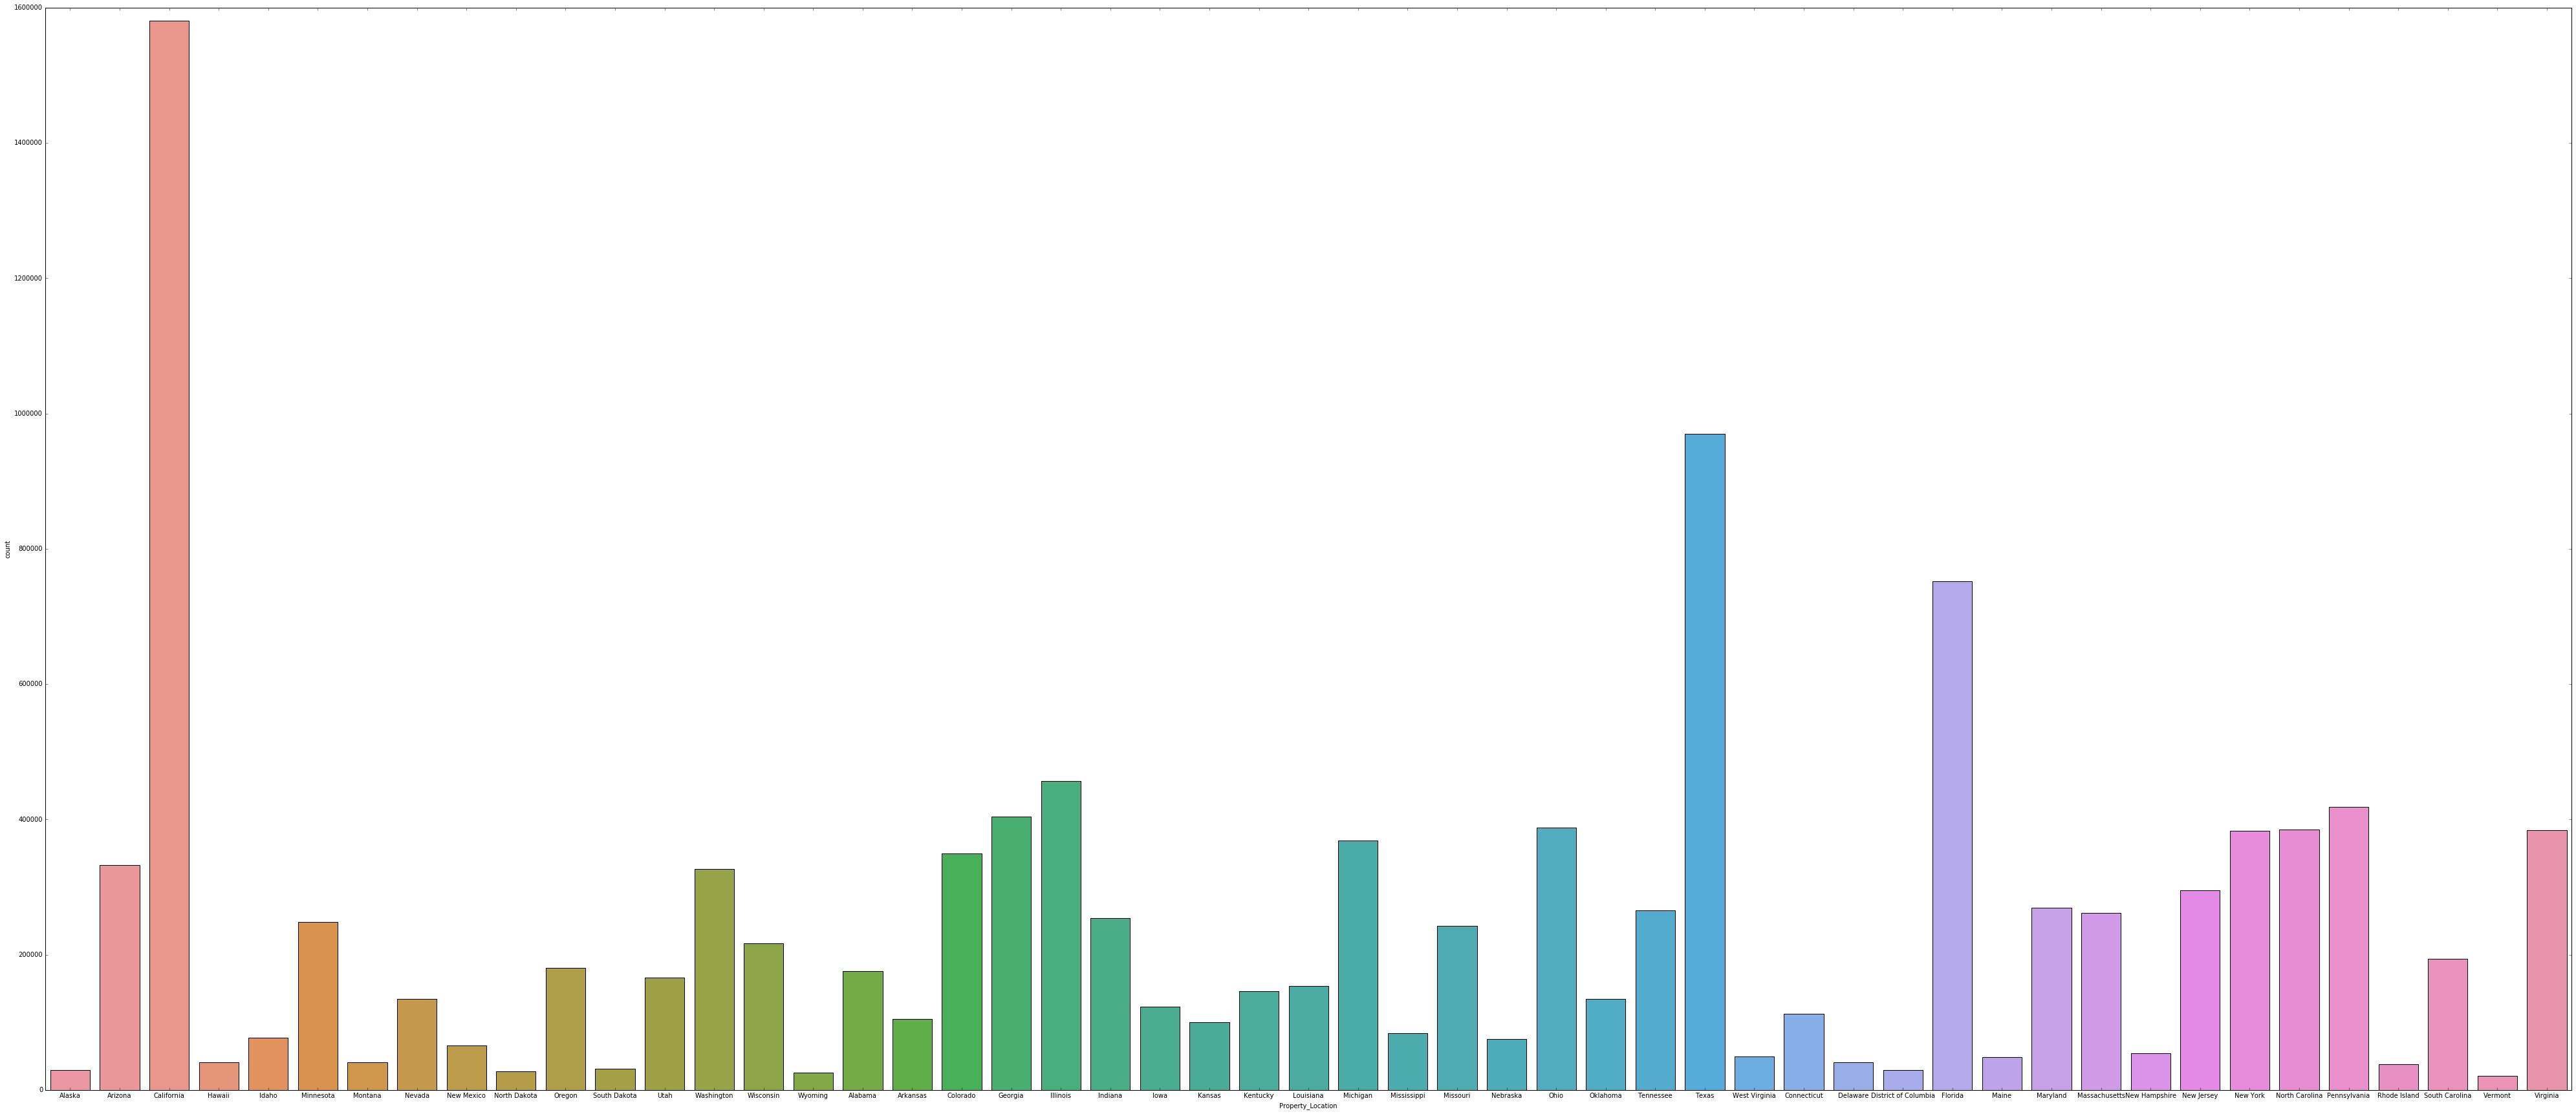

In [108]:
rcParams['figure.figsize']=70,30
pl=sns.countplot(x='Property_Location', data=new_df)
plt.show()

In [109]:

propType = new_df[['Property_Type', 'Loan_Amount', 'Class']]

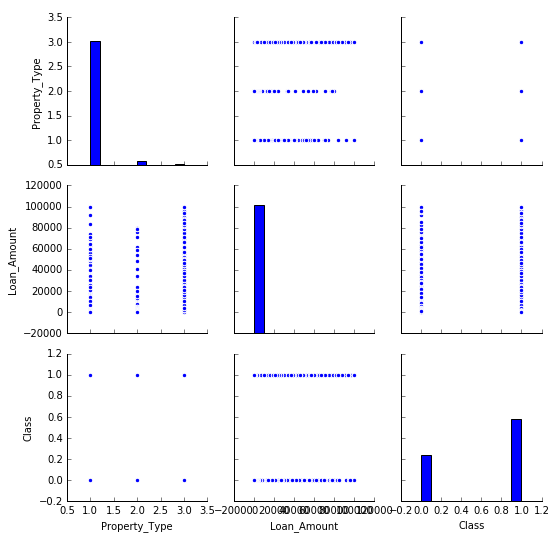

In [110]:
sns.pairplot(propType)